In [126]:
import pandas as pd

In [127]:
clinic_data = pd.read_csv('clinical_trials.csv')

In [128]:
clinic_data

,Condition,Medicine,Number of Trial Men,Number of Trial Women
0,Hypertension,Lisinopril,150,120
1,Diabetes,Metformin,140,110
2,Asthma,Albuterol,120,90
3,Osteoarthritis,Ibuprofen,110,80
4,Depression,Sertraline,130,100
...,...,...,...,...
129,Diabetes,Dapagliflozin,125,70
130,Asthma,Benralizumab,110,60
131,Osteoporosis,Romosozumab,100,55
132,Depression,Levomilnacipran,130,75


In [139]:
clinic_data["Medicine"].str.upper().unique()

array(['LISINOPRIL', 'METFORMIN', 'ALBUTEROL', 'IBUPROFEN', 'SERTRALINE',
       'TIOTROPIUM', 'TAMOXIFEN', 'LEUPROLIDE', 'METHOTREXATE',
       'ORLISTAT', 'EFAVIRENZ', 'DONEPEZIL', 'LEVODOPA', 'LOSARTAN',
       'CLOPIDOGREL', 'AMLODIPINE', 'GLIPIZIDE', 'MONTELUKAST',
       'ALENDRONATE', 'FLUOXETINE', 'SALMETEROL', 'LETROZOLE',
       'BICALUTAMIDE', 'ADALIMUMAB', 'PHENTERMINE', 'TENOFOVIR',
       'RIVASTIGMINE', 'PRAMIPEXOLE', 'EPOETIN ALFA', 'WARFARIN',
       'VALSARTAN', 'SITAGLIPTIN', 'FLUTICASONE', 'RISEDRONATE',
       'ATENOLOL', 'INSULIN', 'BUDESONIDE', 'NAPROXEN', 'BUPROPION',
       'FORMOTEROL', 'ANASTROZOLE', 'DOCETAXEL', 'HYDROXYCHLOROQUINE',
       'LORCASERIN', 'RALTEGRAVIR', 'MEMANTINE', 'SELEGILINE',
       'CINACALCET', 'ASPIRIN', 'DILTIAZEM', 'PIOGLITAZONE',
       'BECLOMETASONE', 'DENOSUMAB', 'ESCITALOPRAM', 'INDACATEROL',
       'EXEMESTANE', 'ENZALUTAMIDE', 'TOFACITINIB',
       'BUPROPION/NALTREXONE', 'DOLUTEGRAVIR', 'GALANTAMINE',
       'RASAGILINE', 'FE

In [149]:
def search_name(dis_med, name_val):
    data_Condition =  clinic_data["Condition"].str.upper().unique()
    data_Medicine=  clinic_data["Medicine"].str.upper().unique()
    IS_legal = True
    IN_database = True
    IS_disease = True
    name_val = name_val.upper()

    if dis_med.upper() == 'DISEASE':
        IS_disease = True
        if name_val not in data_Condition:
            IN_database = False
    elif dis_med.upper() == 'MEDICINE':
        IS_disease = False
        if name_val not in data_Medicine:
            IN_database = False
    else:
        IS_legal = False
        IN_database = False
        
    if IS_legal:
        if not IN_database:
            print("Sorry, it's not in our database. We will make it bigger later.")
    else:
        print("Sorry, it's not a disease or medicine.")
        
    
    return IN_database, IS_disease, name_val    

In [141]:
def draw_chart(IS_disease, name_input):
    
    if IS_disease:
        all_medicines_in_one_codondion(name_input)
        medicine_in_one_codondion(name_input)
        
    else:
        one_medicine(name_input)
        
        

In [142]:
import plotly.graph_objects as go
def medicine_in_one_codondion(disease_name):
    data_disease = clinic_data.loc[clinic_data['Condition'].str.upper() == disease_name.upper()]
    medicines = list(data_disease["Medicine"])
    men_counts = list(data_disease['Number of Trial Men'])
    women_counts = list(data_disease['Number of Trial Women'])
    
    medicine_index = 0  
    for i in range(len(medicines)):
        medicine_index = i
        medicine = medicines[medicine_index]
        men_count = men_counts[medicine_index]
        women_count = women_counts[medicine_index]
        
        # Create a pie chart for the chosen medicine
        labels = ['Men', 'Women']
        values = [men_count, women_count]
        colors = ['#1f77b4', '#ff7f0e']  # Blue for men, Orange for women
        
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1])])
        fig.update_traces(textinfo='percent+label', marker=dict(colors=colors))
        fig.update_layout(title=f'Distribution of Men and Women in {disease_name} Trials')
        
        # Show the plot
        fig.show()

    
    

In [143]:
def all_medicines_in_one_codondion(disease_name):
    data_disease = clinic_data.loc[clinic_data['Condition'].str.upper() == disease_name.upper()]
    medicines = list(data_disease["Medicine"])
    men_counts = list(data_disease['Number of Trial Men'])
    women_counts = list(data_disease['Number of Trial Women'])
    
    medicine_index = 0  
    #medicine = medicines[medicine_index]
    men_count = sum(men_counts)
    women_count = sum(women_counts)
        
        # Create a pie chart for the chosen medicine
    labels = ['Men', 'Women']
    values = [men_count, women_count]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for men, Orange for women
        
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1])])
    fig.update_traces(textinfo='percent+label', marker=dict(colors=colors))
    fig.update_layout(title=f'Distribution of Men and Women in {disease_name} Trials')
        
    # Show the plot
    fig.show()

In [144]:
def one_medicine(medicine_name):
    data_disease = clinic_data.loc[clinic_data['Medicine'].str.upper() == medicine_name.upper()]

    men_counts = data_disease.iloc[0]['Number of Trial Men']
    women_counts = data_disease.iloc[0]['Number of Trial Women']
    
        
        # Create a pie chart for the chosen medicine
    labels = ['Men', 'Women']
    values = [men_counts, women_counts]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for men, Orange for women
        
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1])])
    fig.update_traces(textinfo='percent+label', marker=dict(colors=colors))
    fig.update_layout(title=f'Distribution of Men and Women in {medicine} Trials')
        
    # Show the plot
    fig.show()

Hello! Nice to meet you here.
We are trying to analyze the gender distribution of medicine.


Do you want to know about disease or medicine:  disease
So how about the name of disease?  breast cancer


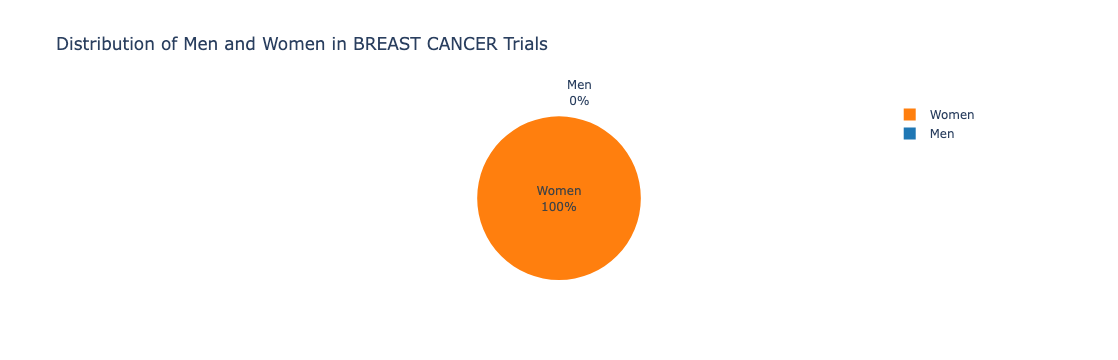

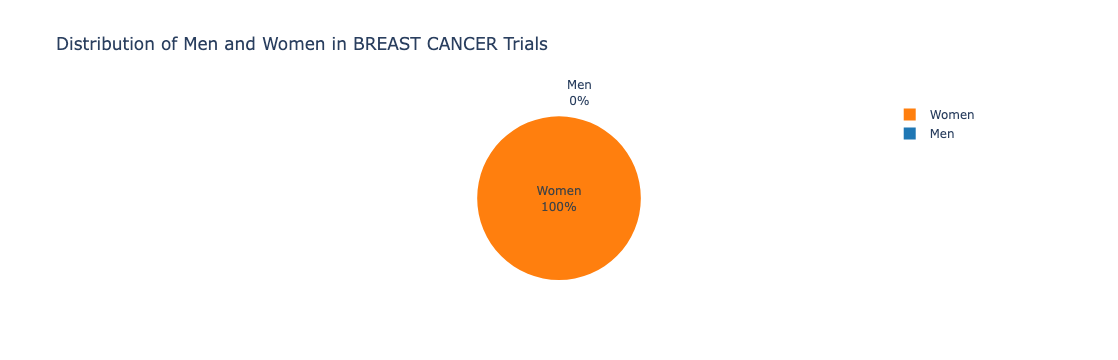

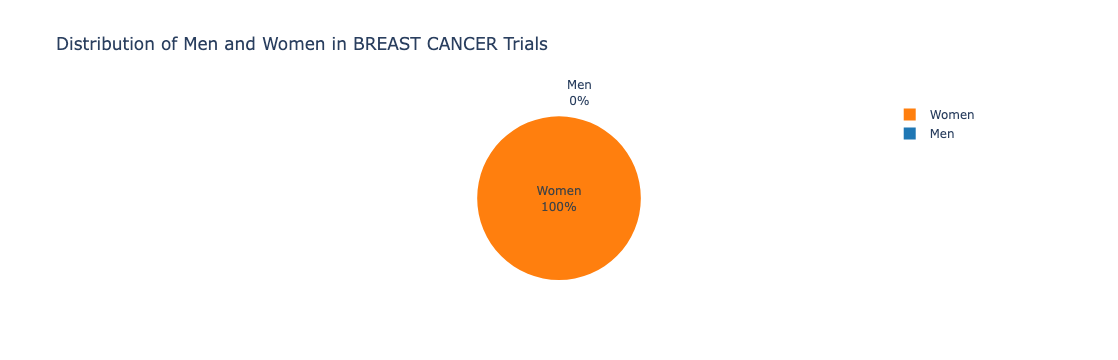

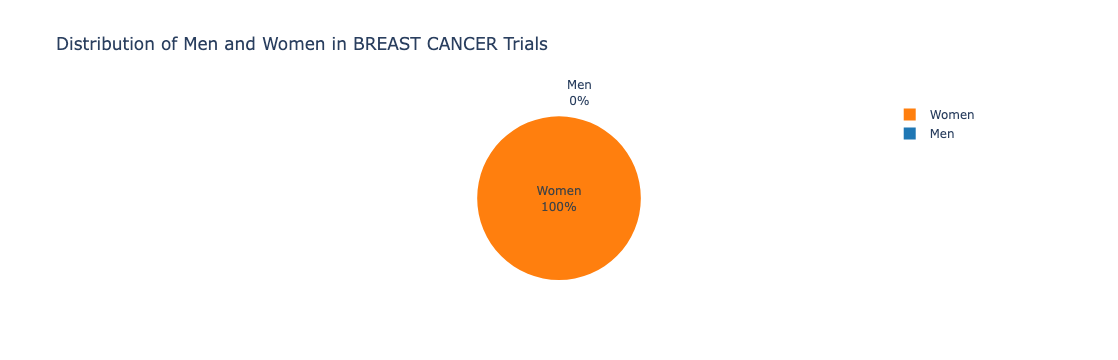

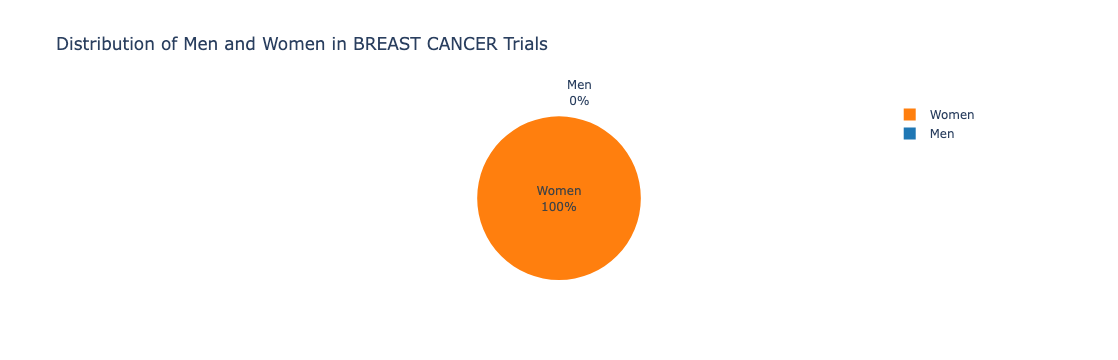

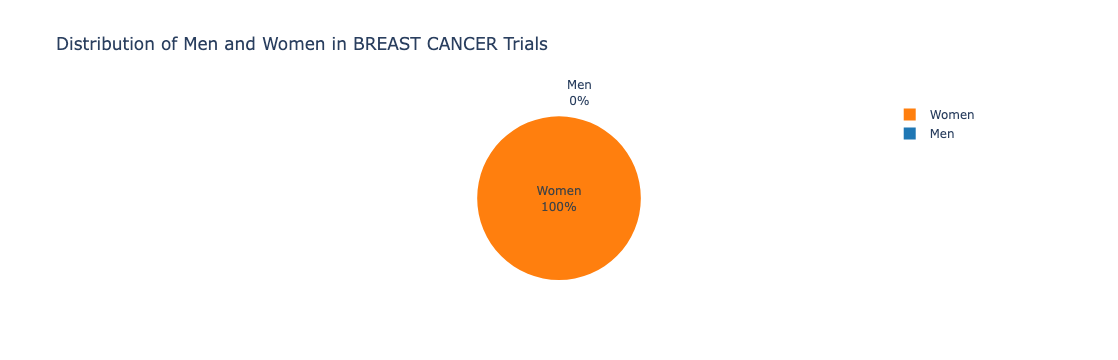

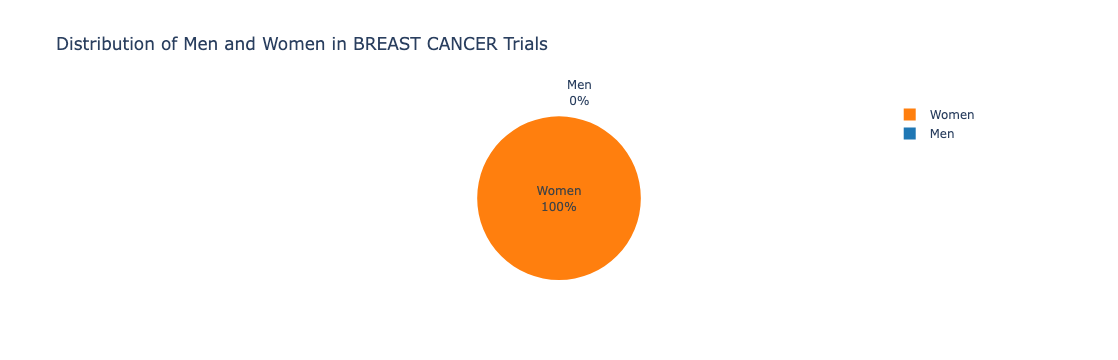

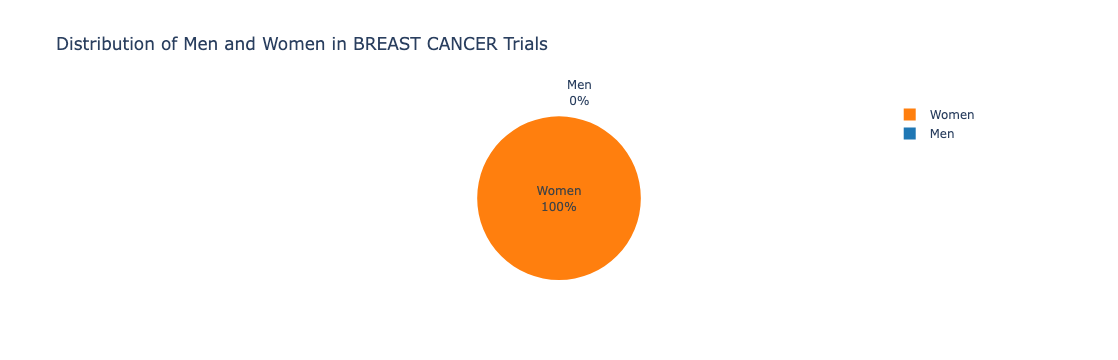

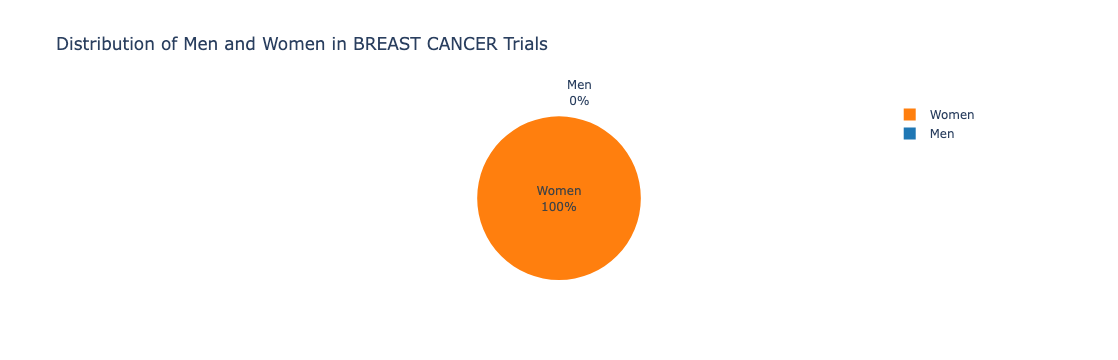

Thank you for your kind trying.
If you have any suggestion, please email me: nancytaihou@163.com


In [150]:
# Setup User Input
def main():
    print('Hello! Nice to meet you here.')
    print('We are trying to analyze the gender distribution of medicine.')

    dis_med = input("Do you want to know about disease or medicine: ")
    name_val = input("So how about the name of " + dis_med + "? ")
    #print("OK")
    
    search_result = search_name(dis_med, name_val)
    if search_result[0]:
        draw_chart(search_result[1], search_result[2])
        print("Thank you for your kind trying.")
        print("If you have any suggestion, please email me: nancytaihou@163.com")

if __name__ == "__main__":
	main()
    